## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from pandas import Series
import tensorflow as tf
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import LeakyReLU
from keras import layers

In [2]:

path = Path(os.getcwd())
path

WindowsPath('C:/Users/Rehan/Dropbox/PC/Desktop/timeseries')

In [3]:
folder="archive"
file_name='BAJAJ-AUTO.csv'
file_path=Path(os.path.join(path,folder,file_name))
file_path

WindowsPath('C:/Users/Rehan/Dropbox/PC/Desktop/timeseries/archive/BAJAJ-AUTO.csv')

## Loading Dataset

In [4]:
f1=pd.read_csv(file_path)
f1


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.00,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.00,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.90,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.40,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.00,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2021-04-26,BAJAJ-AUTO,EQ,3672.50,3682.20,3749.00,3676.00,3739.00,3738.85,3719.79,480016,1.785560e+14,36835.0,155563,0.3241
3198,2021-04-27,BAJAJ-AUTO,EQ,3738.85,3738.85,3798.00,3727.20,3795.00,3785.50,3764.89,518487,1.952048e+14,47765.0,140987,0.2719
3199,2021-04-28,BAJAJ-AUTO,EQ,3785.50,3810.05,3954.00,3807.00,3887.15,3889.75,3909.99,1252958,4.899048e+14,78857.0,190766,0.1523
3200,2021-04-29,BAJAJ-AUTO,EQ,3889.75,3943.00,3954.30,3807.10,3818.95,3836.45,3880.32,1335444,5.181950e+14,92106.0,168500,0.1262


### Summary About the DataSet

In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [6]:
print(f1.columns)
print(f1.isnull().sum())

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64


### Collecting Appropriate Features for predicting Opening Price Of the stock

In [7]:
Features_appropriate=['Date','Open',"High","Low","Last","Close","VWAP"]


In [8]:
data=f1[Features_appropriate]

In [9]:
data

,Date,Open,High,Low,Last,Close,VWAP
0,2008-05-26,898.00,898.00,551.35,600.25,604.75,624.61
1,2008-05-27,624.70,639.00,580.30,595.50,593.15,606.43
2,2008-05-28,561.65,621.90,561.65,605.10,608.15,608.75
3,2008-05-29,619.40,619.40,576.00,600.00,599.45,600.98
4,2008-05-30,605.40,607.00,538.00,576.25,571.70,565.55
...,...,...,...,...,...,...,...
3197,2021-04-26,3682.20,3749.00,3676.00,3739.00,3738.85,3719.79
3198,2021-04-27,3738.85,3798.00,3727.20,3795.00,3785.50,3764.89
3199,2021-04-28,3810.05,3954.00,3807.00,3887.15,3889.75,3909.99
3200,2021-04-29,3943.00,3954.30,3807.10,3818.95,3836.45,3880.32


In [10]:
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Last     0
Close    0
VWAP     0
dtype: int64

## Converting date from string format to date object and then convet the date coulumn to index

In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP'], dtype='object')

In [12]:
data["Date"]=pd.to_datetime(data["Date"])

C:\Users\Rehan\AppData\Local\Temp\ipykernel_14372\4180801017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"]=pd.to_datetime(data["Date"])


In [13]:
data

,Date,Open,High,Low,Last,Close,VWAP
0,2008-05-26,898.00,898.00,551.35,600.25,604.75,624.61
1,2008-05-27,624.70,639.00,580.30,595.50,593.15,606.43
2,2008-05-28,561.65,621.90,561.65,605.10,608.15,608.75
3,2008-05-29,619.40,619.40,576.00,600.00,599.45,600.98
4,2008-05-30,605.40,607.00,538.00,576.25,571.70,565.55
...,...,...,...,...,...,...,...
3197,2021-04-26,3682.20,3749.00,3676.00,3739.00,3738.85,3719.79
3198,2021-04-27,3738.85,3798.00,3727.20,3795.00,3785.50,3764.89
3199,2021-04-28,3810.05,3954.00,3807.00,3887.15,3889.75,3909.99
3200,2021-04-29,3943.00,3954.30,3807.10,3818.95,3836.45,3880.32


In [14]:
type(data["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
data.set_index('Date',inplace=True)

In [16]:
data.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'VWAP'], dtype='object')

## EDA

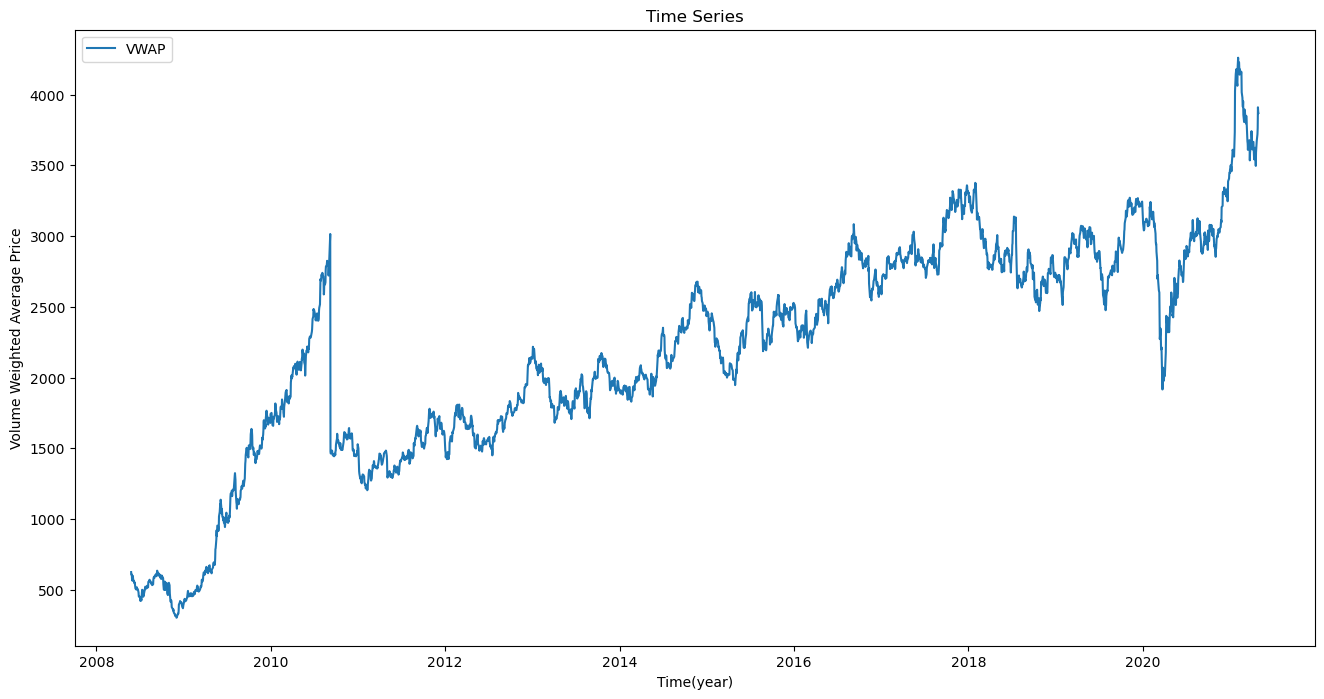

In [17]:
plt.figure(figsize=(16,8))
plt.plot(data['VWAP'], label='VWAP')
plt.title('Time Series')
plt.xlabel("Time(year)")
plt.ylabel("Volume Weighted Average Price")
plt.legend(loc='best')

## Applying Standard Scaler function to scale down data

In [18]:

s1=StandardScaler()
s1.fit(data)
data_scaled=s1.fit_transform(data)
columns=list(data.columns)
data_scaled=pd.DataFrame(data_scaled,columns=columns)
data_scaled

,Open,High,Low,Last,Close,VWAP
0,-1.666872,-1.692255,-2.091838,-2.051834,-2.046082,-2.020130
1,-2.019050,-2.023810,-2.054244,-2.057963,-2.061051,-2.043572
2,-2.100297,-2.045700,-2.078462,-2.045575,-2.041695,-2.040581
3,-2.025880,-2.048900,-2.059828,-2.052156,-2.052921,-2.050600
4,-2.043920,-2.064774,-2.109174,-2.082804,-2.088729,-2.096284
...,...,...,...,...,...,...
3197,1.920889,1.957410,1.965771,1.998455,1.998049,1.970889
3198,1.993889,2.020137,2.032258,2.070718,2.058245,2.029042
3199,2.085638,2.219838,2.135885,2.189629,2.192765,2.216139
3200,2.256960,2.220222,2.136015,2.101623,2.123989,2.177881


## Importing Lstm Model

In [19]:
window_size=20
no_of_features=data_scaled.shape[1]
batch_size=32
shape1=data_scaled.shape[0]

In [20]:
split_time=int(0.85*shape1)
x_train=data_scaled.iloc[:split_time,:]
x_valid=data_scaled.iloc[split_time:,:]

In [21]:
x_train.shape,x_valid.shape

((2721, 6), (481, 6))

## Preparing the data in format of (no of samples,time_steps,features)

In [22]:
x=[]
y=[]
shape2=x_train.shape[0]
for i in range(0,shape2-window_size):
    x.append(x_train.iloc[i:i+window_size,:])
    y.append(x_train["Open"][i+window_size])
x=np.array(x)
y=np.array(y)
y=np.expand_dims(y,axis=-1)

In [23]:
x.shape,y.shape

((2701, 20, 6), (2701, 1))

In [24]:
x[0]

array([[-1.66687174, -1.69225483, -2.09183785, -2.05183362, -2.04608247,
        -2.02013038],
       [-2.0190501 , -2.02380984, -2.05424395, -2.05796309, -2.0610507 ,
        -2.04357223],
       [-2.10029724, -2.04570015, -2.07846247, -2.04557511, -2.04169523,
        -2.04058075],
       [-2.02587975, -2.04890049, -2.05982784, -2.05215623, -2.0529214 ,
        -2.05059962],
       [-2.04392036, -2.06477416, -2.10917389, -2.08280357, -2.08872902,
        -2.09628414],
       [-2.04379149, -2.05453308, -2.06671032, -2.08699742, -2.0769867 ,
        -2.0540553 ],
       [-2.05603333, -2.07117484, -2.08690324, -2.08183576, -2.0784061 ,
        -2.0830288 ],
       [-2.0536494 , -2.0764874 , -2.09683738, -2.11667695, -2.11402017,
        -2.09874696],
       [-2.11144376, -2.08807262, -2.11644594, -2.11925778, -2.10072941,
        -2.10253788],
       [-2.09340315, -2.10612253, -2.10086298, -2.08828783, -2.09247108,
        -2.09779278],
       [-2.08309424, -2.10573849, -2.12735402, -2.

In [25]:



model=tf.keras.Sequential([
    layers.LSTM(44,return_sequences=True,input_shape=[window_size,no_of_features]),
    layers.LSTM(44),
    layers.Dense(20),
    LeakyReLU(alpha=0.05),
    layers.Dense(1)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 44)            8976      
                                                                 
 lstm_1 (LSTM)               (None, 44)                15664     
                                                                 
 dense (Dense)               (None, 20)                900       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,561
Trainable params: 25,561
Non-trainable params: 0
_________________________________________________________________


In [26]:
loss_function=tf.keras.losses.Huber()
optimizer_function=tf.keras.optimizers.SGD()
metrics_function=['mse']
model.compile(optimizer=optimizer_function,loss=loss_function,metrics=metrics_function)

In [27]:
model.fit(x,y,batch_size=batch_size,epochs=50)

Epoch 1/50
85/85 [==============================] - 9s 23ms/step - loss: 0.1401 - mse: 0.2959
Epoch 2/50
85/85 [==============================] - 2s 22ms/step - loss: 0.0357 - mse: 0.0719
Epoch 3/50
85/85 [==============================] - 2s 24ms/step - loss: 0.0250 - mse: 0.0506
Epoch 4/50
85/85 [==============================] - 2s 24ms/step - loss: 0.0188 - mse: 0.0383
Epoch 5/50
85/85 [==============================] - 2s 26ms/step - loss: 0.0149 - mse: 0.0304
Epoch 6/50
85/85 [==============================] - 2s 23ms/step - loss: 0.0123 - mse: 0.0252
Epoch 7/50
85/85 [==============================] - 2s 24ms/step - loss: 0.0105 - mse: 0.0216
Epoch 8/50
85/85 [==============================] - 2s 22ms/step - loss: 0.0093 - mse: 0.0192
Epoch 9/50
85/85 [==============================] - 2s 23ms/step - loss: 0.0084 - mse: 0.0174
Epoch 10/50
85/85 [==============================] - 2s 22ms/step - loss: 0.0078 - mse: 0.0161
Epoch 11/50
85/85 [==============================] - 2s 23m

In [28]:
x_v=[]
y_v=[]
shape3=x_valid.shape[0]
for i in range(0,shape3-window_size):
    x_v.append(x_valid.iloc[i:i+window_size,:])
    y_v.append(x_valid.iloc[i+window_size,0])
x_v=np.array(x_v)
y_v=np.array(y_v)
# y=np.expand_dims(y,axis=-1)

In [29]:
x_v.shape,y_v.shape

((461, 20, 6), (461,))

## Predictions

In [30]:
def forecast(x_v):
    y_pred=model.predict(x_v)
    y_pred=np.squeeze(y_pred)
    return y_pred


In [46]:
y_pred=forecast(x_v)

15/15 [==============================] - 0s 9ms/step


array([ 9.3446785e-01,  9.1979986e-01,  9.0371084e-01,  8.8797736e-01,
        8.7622577e-01,  8.6848277e-01,  8.6056691e-01,  8.5823894e-01,
        8.6052477e-01,  8.6409062e-01,  8.6879766e-01,  8.7106490e-01,
        8.6396122e-01,  8.5163206e-01,  8.3425367e-01,  8.0975449e-01,
        7.8499210e-01,  7.6119214e-01,  7.4055004e-01,  7.2132045e-01,
        6.9965404e-01,  6.7026842e-01,  6.3598347e-01,  5.9861338e-01,
        5.6076139e-01,  5.2822971e-01,  5.0818735e-01,  4.8721939e-01,
        4.6211657e-01,  4.4039911e-01,  4.2480299e-01,  4.2023033e-01,
        4.2553502e-01,  4.3694958e-01,  4.5089075e-01,  4.7192675e-01,
        4.9966696e-01,  5.2622360e-01,  5.5253446e-01,  5.7851195e-01,
        6.0286349e-01,  6.2411577e-01,  6.4374769e-01,  6.5965623e-01,
        6.7195815e-01,  6.8177986e-01,  6.9273770e-01,  7.0114481e-01,
        7.0654523e-01,  7.1209365e-01,  7.1693611e-01,  7.1908778e-01,
        7.2002554e-01,  7.2645485e-01,  7.3395795e-01,  7.5096768e-01,
      

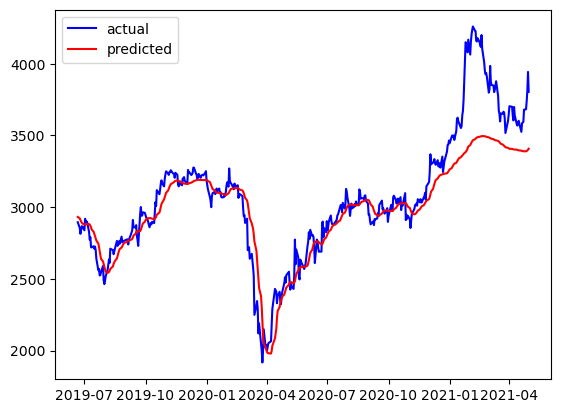

In [32]:
actual_data=data.iloc[split_time+window_size:,0]
y_pred_new = np.expand_dims(y_pred, axis=-1)
y_pred_new=np.repeat(y_pred_new,repeats=6,axis=1)
y_pred_new_actual=s1.inverse_transform(y_pred_new)
pred_actual=y_pred_new_actual[:,0]
pred_actual=pd.Series(pred_actual,index=actual_data.index)
plt.plot(actual_data,'b',label='actual')
plt.plot(pred_actual,'r',label='predicted')
plt.legend()

In [33]:
print("MSE ERROR FOR THE DATA ",tf.keras.losses.mse(y_pred,y_v).numpy())

MSE ERROR FOR THE DATA  0.06925076324204515


## trainig the model again with the validation dataset

In [34]:
model.fit(x_v,y_v,batch_size=32,epochs=20)

Epoch 1/20
15/15 [==============================] - 6s 22ms/step - loss: 0.0296 - mse: 0.0593
Epoch 2/20
15/15 [==============================] - 0s 19ms/step - loss: 0.0255 - mse: 0.0496
Epoch 3/20
15/15 [==============================] - 0s 22ms/step - loss: 0.0227 - mse: 0.0460
Epoch 4/20
15/15 [==============================] - 0s 20ms/step - loss: 0.0204 - mse: 0.0395
Epoch 5/20
15/15 [==============================] - 0s 21ms/step - loss: 0.0186 - mse: 0.0363
Epoch 6/20
15/15 [==============================] - 0s 21ms/step - loss: 0.0172 - mse: 0.0353
Epoch 7/20
15/15 [==============================] - 0s 22ms/step - loss: 0.0160 - mse: 0.0328
Epoch 8/20
15/15 [==============================] - 0s 31ms/step - loss: 0.0150 - mse: 0.0293
Epoch 9/20
15/15 [==============================] - 0s 29ms/step - loss: 0.0142 - mse: 0.0277
Epoch 10/20
15/15 [==============================] - 0s 26ms/step - loss: 0.0138 - mse: 0.0284
Epoch 11/20
15/15 [==============================] - 0s 25m

## predicting with the newly trained model

In [35]:
y_pred=forecast(x_v)

15/15 [==============================] - 0s 9ms/step


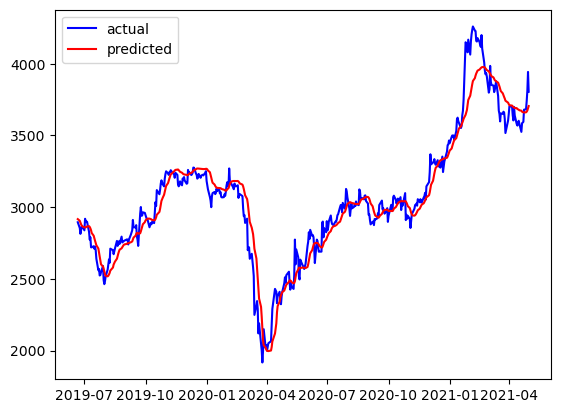

In [36]:
actual_data=data.iloc[split_time+window_size:,0]
y_pred_new = np.expand_dims(y_pred, axis=-1)
y_pred_new=np.repeat(y_pred_new,repeats=6,axis=1)
y_pred_new_actual=s1.inverse_transform(y_pred_new)
pred_actual=y_pred_new_actual[:,0]
pred_actual=pd.Series(pred_actual,index=actual_data.index)
plt.plot(actual_data,'b',label='actual')

plt.plot(pred_actual,'r',label='predicted')
plt.legend()

In [37]:
print("MSE ERROR FOR THE DATA ",tf.keras.losses.mse(y_pred,y_v).numpy())


MSE ERROR FOR THE DATA  0.021819029556539388


In [38]:
x_test=x_valid.iloc[-20:,]
x_test=np.expand_dims(x_test,axis=0)


In [39]:
value=model.predict(x_test)

1/1 [==============================] - 0s 60ms/step


In [40]:
value=np.repeat(value,6)

In [41]:
value=np.expand_dims(value,axis=0)


In [42]:
value=s1.inverse_transform(value)

In [43]:
data.iloc[-1,:]

Open     3805.00
High     3966.35
Low      3800.00
Last     3827.00
Close    3833.75
VWAP     3869.17
Name: 2021-04-30 00:00:00, dtype: float64

In [44]:
print("New stock price for the may 1st 2021 ",value[:,0])

New stock price for the may 1st 2021  [3720.372]
